In [233]:
import pandas as pd
import numpy as np
import os
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itables import show

filterwarnings('ignore')

In [234]:
df_clean = pd.read_csv(
    r'../data/processed/uber_clean.csv',
    keep_default_na=True
)

df_clean.head()

,Date,Booking Status,Vehicle Type,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,No Driver Found,eBike,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,Incomplete,Go Sedan,4.9,14.0,0,NaN,0,NaN,1,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,Completed,Auto,13.4,25.8,0,NaN,0,NaN,0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,Completed,Premier Sedan,13.1,28.5,0,NaN,0,NaN,0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,Completed,Bike,5.3,19.6,0,NaN,0,NaN,0,NaN,737.0,48.21,4.1,4.3,UPI


In [235]:
df_clean.shape

(150000, 16)

In [236]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Booking Status                     150000 non-null  object 
 2   Vehicle Type                       150000 non-null  object 
 3   Avg VTAT                           139500 non-null  float64
 4   Avg CTAT                           102000 non-null  float64
 5   Cancelled Rides by Customer        150000 non-null  int64  
 6   Reason for cancelling by Customer  10500 non-null   object 
 7   Cancelled Rides by Driver          150000 non-null  int64  
 8   Driver Cancellation Reason         27000 non-null   object 
 9   Incomplete Rides                   150000 non-null  int64  
 10  Incomplete Rides Reason            9000 non-null    object 
 11  Booking Value                      1020

In [237]:
df_clean.describe().round(2)

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.00,102000.00,150000.00,150000.00,150000.00,102000.00,102000.00,93000.00,93000.00
mean,8.46,29.15,0.07,0.18,0.06,508.30,24.64,4.23,4.40
std,3.77,8.90,0.26,0.38,0.24,395.81,14.00,0.44,0.44
min,2.00,10.00,0.00,0.00,0.00,50.00,1.00,3.00,3.00
25%,5.30,21.60,0.00,0.00,0.00,234.00,12.46,4.10,4.20
50%,8.30,28.80,0.00,0.00,0.00,414.00,23.72,4.30,4.50
75%,11.30,36.80,0.00,0.00,0.00,689.00,36.82,4.60,4.80
max,20.00,45.00,1.00,1.00,1.00,4277.00,50.00,5.00,5.00


In [238]:
df_clean.corr(numeric_only=True)

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
Avg VTAT,1.000000,0.062175,0.306655,-0.123904,-0.169989,0.002259,0.063005,-0.005439,-0.003945
Avg CTAT,0.062175,1.000000,NaN,NaN,-0.319607,0.000216,0.101503,0.000807,0.001000
Cancelled Rides by Customer,0.306655,NaN,1.000000,-0.128540,-0.069314,NaN,NaN,NaN,NaN
Cancelled Rides by Driver,-0.123904,NaN,-0.128540,1.000000,-0.118370,NaN,NaN,NaN,NaN
Incomplete Rides,-0.169989,-0.319607,-0.069314,-0.118370,1.000000,0.000956,-0.313024,NaN,NaN
Booking Value,0.002259,0.000216,NaN,NaN,0.000956,1.000000,0.005174,-0.000249,-0.000287
Ride Distance,0.063005,0.101503,NaN,NaN,-0.313024,0.005174,1.000000,-0.001875,0.004514
Driver Ratings,-0.005439,0.000807,NaN,NaN,NaN,-0.000249,-0.001875,1.000000,-0.001010
Customer Rating,-0.003945,0.001000,NaN,NaN,NaN,-0.000287,0.004514,-0.001010,1.000000


In [239]:
df_clean.columns

Index(['Date', 'Booking Status', 'Vehicle Type', 'Avg VTAT', 'Avg CTAT',
       'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
       'Cancelled Rides by Driver', 'Driver Cancellation Reason',
       'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [240]:
df_clean[['Vehicle Type', 'Avg CTAT']].groupby(by='Vehicle Type').agg('sum')

,Avg CTAT
Vehicle Type,
Auto,740651.6
Bike,448559.6
Go Mini,593798.7
Go Sedan,531958.7
Premier Sedan,359828.8
Uber XL,88944.0
eBike,209521.5


In [241]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

In [242]:
temp_df = df_clean.copy(deep=True)
temp_df = temp_df[['Date', 'Booking Value']]

In [243]:
temp_df['Booking Value'] = temp_df['Booking Value'].interpolate(method='linear')

temp_df['Booking Value'].unique()

array([    nan,  237.  ,  627.  , ..., 2842.  ,  927.75, 3028.  ],
      shape=(11171,))

In [244]:
temp_df['Booking Value'] = temp_df['Booking Value'].fillna(method='bfill').fillna(method='ffill')

In [245]:
temp_df['Booking Value'].isna().sum()

np.int64(0)

In [246]:
temp_df['Booking Value'].unique()

array([ 237.  ,  627.  ,  416.  , ..., 2842.  ,  927.75, 3028.  ],
      shape=(11170,))

In [247]:
temp_df = temp_df.sort_values('Date')

In [248]:
daily_df = temp_df.groupby('Date', as_index=False)['Booking Value'].mean()

fig = px.line(
    daily_df, x='Date', y='Booking Value',
    title='Daily Booking Value',
    markers=True
)

fig.update_traces(
    line=dict(color='purple', width=2),
    marker=dict(color='purple', size=4)
)

fig.show()

In [249]:
temp_df = df_clean.copy(deep=True)
temp_df = temp_df[['Vehicle Type', 'Driver Ratings']]

In [250]:
temp_df.head()

,Vehicle Type,Driver Ratings
0,eBike,NaN
1,Go Sedan,NaN
2,Auto,4.9
3,Premier Sedan,4.6
4,Bike,4.1


In [251]:
temp_df = temp_df.groupby(
    by='Vehicle Type'
).agg('mean')

temp_df

,Driver Ratings
Vehicle Type,
Auto,4.232369
Bike,4.230056
Go Mini,4.227694
Go Sedan,4.231812
Premier Sedan,4.234865
Uber XL,4.238340
eBike,4.225614


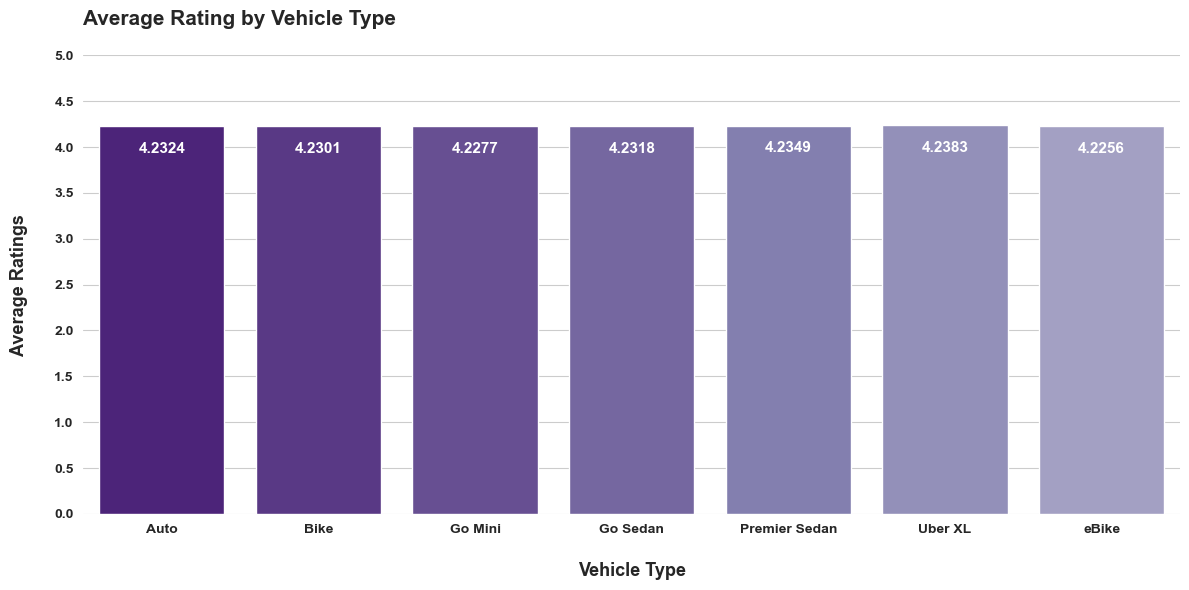

In [252]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.barplot(
        ax=ax, data=temp_df,
        x=temp_df.index,
        y='Driver Ratings',
        hue=temp_df.index,
        palette=sns.color_palette('Purples_r', 13)[0:8]
    )

    ax.set_title('Average Rating by Vehicle Type\n', fontdict={
        'fontsize': 15,
        'fontweight': 'bold'
    }, loc='left')

    ax.set_ylabel('Average Ratings\n', fontdict={
        'fontsize': 13,
        'fontweight': 'bold'
    })

    ylabels = list(np.arange(0, 4.5 + 1, 0.5))

    ax.set_yticks(ylabels)
    ax.set_yticklabels(ylabels, fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    ax.set_xlabel('\nVehicle Type', fontdict={
        'fontsize': 13,
        'fontweight': 'bold'
    })
    
    xlabels = list(temp_df.index)

    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    for i, v in enumerate(temp_df['Driver Ratings']):
        ax.text(
            x=i,
            y=v - 0.25,
            s=f'{float(v).__round__(4)}',
            color='white',
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )

    ax.set_frame_on(False)
    plt.tight_layout()
    plt.show()

In [253]:
df_cancel = df_clean.copy(deep=True)[['Cancelled Rides by Customer', 'Cancelled Rides by Driver']]

df_cancel.head()

,Cancelled Rides by Customer,Cancelled Rides by Driver
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [254]:
df_cancel.dtypes

Cancelled Rides by Customer    int64
Cancelled Rides by Driver      int64
dtype: object

In [255]:
df_cancel['Cancelled Rides by Customer'].value_counts()

Cancelled Rides by Customer
0    139500
1     10500
Name: count, dtype: int64

In [256]:
df_cancel['Cancelled Rides by Driver'].value_counts()

Cancelled Rides by Driver
0    123000
1     27000
Name: count, dtype: int64

In [257]:
df_cancel['Cancelled Rides by Customer'].sum()

np.int64(10500)

In [258]:
df_cancel['Cancelled Rides by Driver'].sum()

np.int64(27000)

In [259]:
customer_total = sum(df_cancel['Cancelled Rides by Customer'])
drivers_total = sum(df_cancel['Cancelled Rides by Driver'])

In [260]:
print(customer_total, drivers_total)

10500 27000


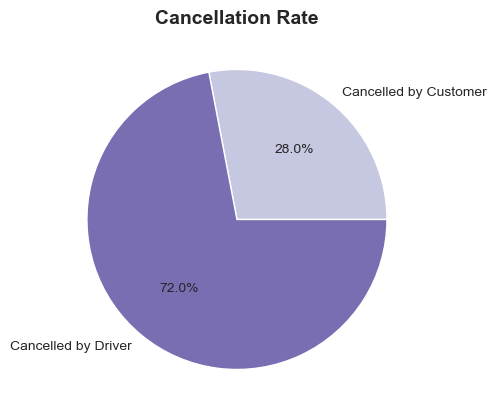

In [261]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(5, 5))

    data = [customer_total, drivers_total]
    labels = ['Cancelled by Customer', 'Cancelled by Driver']

    ax.set_title('Cancellation Rate', fontdict={
        'fontsize': 14,
        'fontweight': 'bold'
    })

    ax.pie(data,
           labels=labels,
           autopct='%1.1f%%',
           startangle=0,
           colors=sns.color_palette('Purples', 2))

    plt.tight_layout()
    plt.show()

In [262]:
reasons_columns = ['Driver Cancellation Reason', 'Reason for cancelling by Customer']

df_cancel_reasons = df_clean.copy(deep=True)[reasons_columns]

In [263]:
for column in df_cancel_reasons.columns:
    print(
        f'Column: {column}\n',
        f'{df_cancel_reasons[column].unique()}\n'
    )

Column: Driver Cancellation Reason
 [nan 'Personal & Car related issues' 'Customer related issue'
 'More than permitted people in there' 'The customer was coughing/sick']

Column: Reason for cancelling by Customer
 [nan 'Driver is not moving towards pickup location'
 'Driver asked to cancel' 'AC is not working' 'Change of plans'
 'Wrong Address']



In [264]:
df_cancel_reasons_customer = df_cancel_reasons.copy(deep=True)[['Reason for cancelling by Customer']]
df_cancel_reasons_driver = df_cancel_reasons.copy(deep=True)[['Driver Cancellation Reason']]

In [265]:
def normalize_column(df, col_name, new_col_name=None):
    total = df[col_name].sum()

    if new_col_name is None:
        new_col_name = col_name + "_normalized"
    
    df[new_col_name] = df[col_name] / total
    return df

In [266]:
df_cancel_reasons_driver = pd.DataFrame(df_cancel_reasons_driver.groupby(
    by='Driver Cancellation Reason'
).value_counts()).reset_index().rename(
    columns={
        'Driver Cancellation Reason': 'Driver Cancellation Reason',
        'count': 'Count'
    }
)

df_cancel_reasons_driver = df_cancel_reasons_driver.sort_values(by='Count', ascending=False)

In [267]:
df_cancel_reasons_customer = pd.DataFrame(df_cancel_reasons_customer.groupby(
    by='Reason for cancelling by Customer'
).value_counts()).reset_index().rename(
    columns={
        'Reason for cancelling by Customer': 'Reason for cancelling by Customer',
        'count': 'Count'
    }
)

df_cancel_reasons_customer = df_cancel_reasons_customer.sort_values(by='Count', ascending=False)

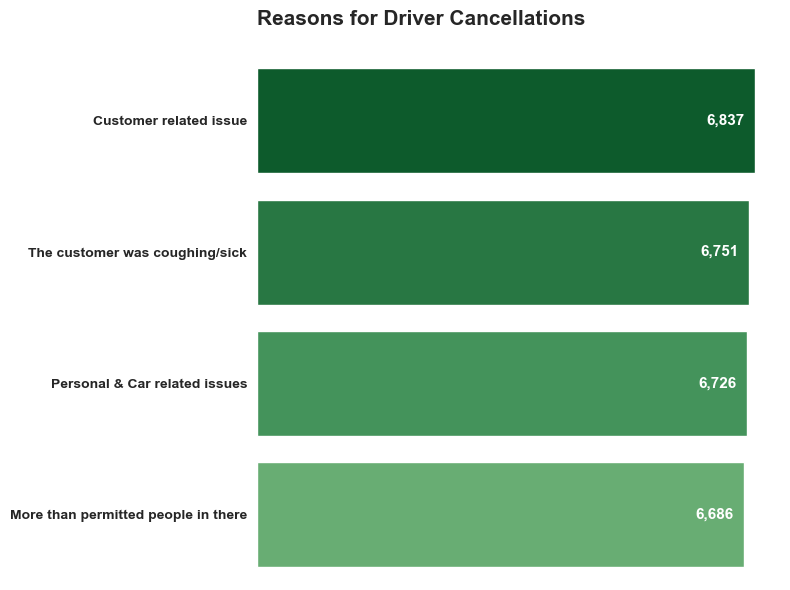

In [268]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(
        data=df_cancel_reasons_driver,
        x='Count',
        y='Driver Cancellation Reason',
        palette=sns.color_palette('Greens_r', 8)[0:4],
        ax=ax
    )

    ax.set_title('Reasons for Driver Cancellations\n', fontdict={
        'fontsize': 15,
        'fontweight': 'bold'
    }, loc='left')

    ax.set_xlabel('', fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    ax.set_ylabel('')

    xticks = list(np.arange(0, 7500 + 1, 1500))

    ax.set_xticks([])
    # ax.set_xticklabels(labels=xticks, fontdict={
    #     'fontsize': 10,
    #     'fontweight': 'bold'
    # })

    yticks = list(df_cancel_reasons_driver['Driver Cancellation Reason'].unique())

    ax.set_yticks(yticks)
    ax.set_yticklabels(labels=yticks, fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    for i, v in enumerate(df_cancel_reasons_driver['Count']):
        ax.text(
            x=v - 400,
            y=i,
            s=f'{v:,}',
            color='white',
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )

    ax.set_frame_on(False)
    plt.tight_layout()
    plt.show()

In [269]:
df_cancel_reasons_customer

,Reason for cancelling by Customer,Count
4,Wrong Address,2362
1,Change of plans,2353
3,Driver is not moving towards pickup location,2335
2,Driver asked to cancel,2295
0,AC is not working,1155


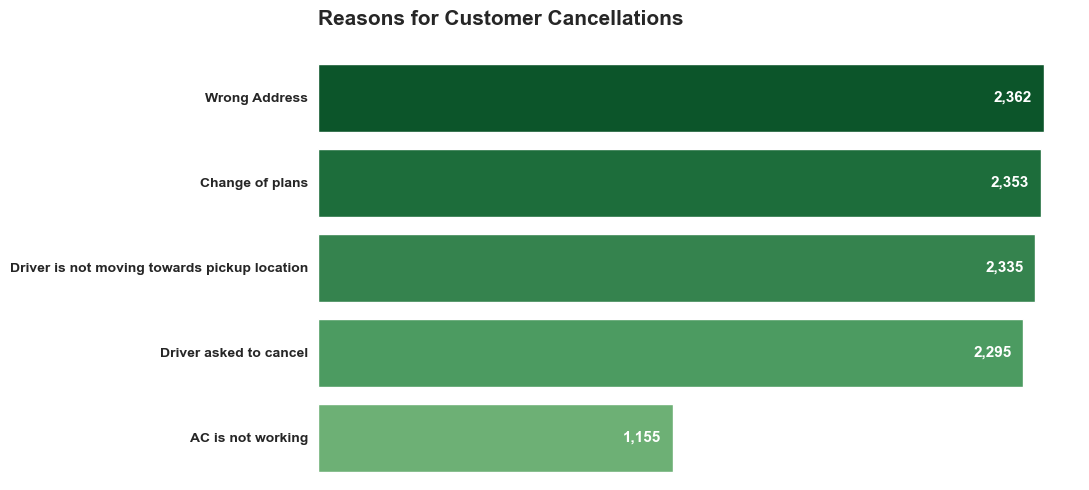

In [270]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(11, 5))
    sns.barplot(
        data=df_cancel_reasons_customer,
        ax=ax,
        x='Count',
        y='Reason for cancelling by Customer',
        palette=sns.color_palette('Greens_r', 10)[0:5]
    )

    ax.set_title('Reasons for Customer Cancellations\n', fontdict={
        'fontsize': 15,
        'fontweight': 'bold'
    }, loc='left')

    ax.set_xlabel('', fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    ax.set_ylabel('')

    xticks = list(np.arange(0, 3500 + 1, 1000))

    ax.set_xticks([])
    # ax.set_xticklabels(labels=xticks, fontdict={
    #     'fontsize': 10,
    #     'fontweight': 'bold'
    # })

    yticks = list(df_cancel_reasons_customer['Reason for cancelling by Customer'].unique())

    ax.set_yticks(yticks)
    ax.set_yticklabels(labels=yticks, fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    for i, v in enumerate(df_cancel_reasons_customer['Count']):
        ax.text(
            x=v - 100,
            y=i,
            s=f'{v:,}',
            color='white',
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )

    ax.set_frame_on(False)
    plt.tight_layout()
    plt.show()

In [271]:
df_clean = df_clean.sort_values(by='Date').reset_index(drop=True)

In [272]:
df_clean.columns

Index(['Date', 'Booking Status', 'Vehicle Type', 'Avg VTAT', 'Avg CTAT',
       'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
       'Cancelled Rides by Driver', 'Driver Cancellation Reason',
       'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [273]:
wanted_cols = ['Date', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver']

df_days_of_cancelling = df_clean.copy(deep=True)[wanted_cols]

df_days_of_cancelling

,Date,Cancelled Rides by Customer,Cancelled Rides by Driver
0,2024-01-01,0,0
1,2024-01-01,0,0
2,2024-01-01,0,1
3,2024-01-01,0,1
4,2024-01-01,0,0
...,...,...,...
149995,2024-12-30,0,0
149996,2024-12-30,0,1
149997,2024-12-30,0,0
149998,2024-12-30,0,0


In [274]:
df_days_of_cancelling['Days'] = df_days_of_cancelling['Date'].dt.day_name()
df_days_of_cancelling['Days'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [275]:
cols = ['Days', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver']

df_days_of_cancelling = df_days_of_cancelling[cols].groupby(
    by='Days'
).agg('sum')

In [276]:
df_days_of_cancelling['Total Cancelling'] = df_days_of_cancelling['Cancelled Rides by Customer'] + df_days_of_cancelling['Cancelled Rides by Driver']

In [277]:
df_days_of_cancelling = df_days_of_cancelling.sort_values(by='Total Cancelling', ascending=False)
df_days_of_cancelling

,Cancelled Rides by Customer,Cancelled Rides by Driver,Total Cancelling
Days,,,
Monday,1511,4041,5552
Tuesday,1469,3919,5388
Friday,1566,3777,5343
Sunday,1508,3835,5343
Saturday,1454,3874,5328
Wednesday,1513,3802,5315
Thursday,1479,3752,5231


In [301]:
df_days_of_cancelling.to_csv(r'../data/processed/df_days_of_cancelling.csv')

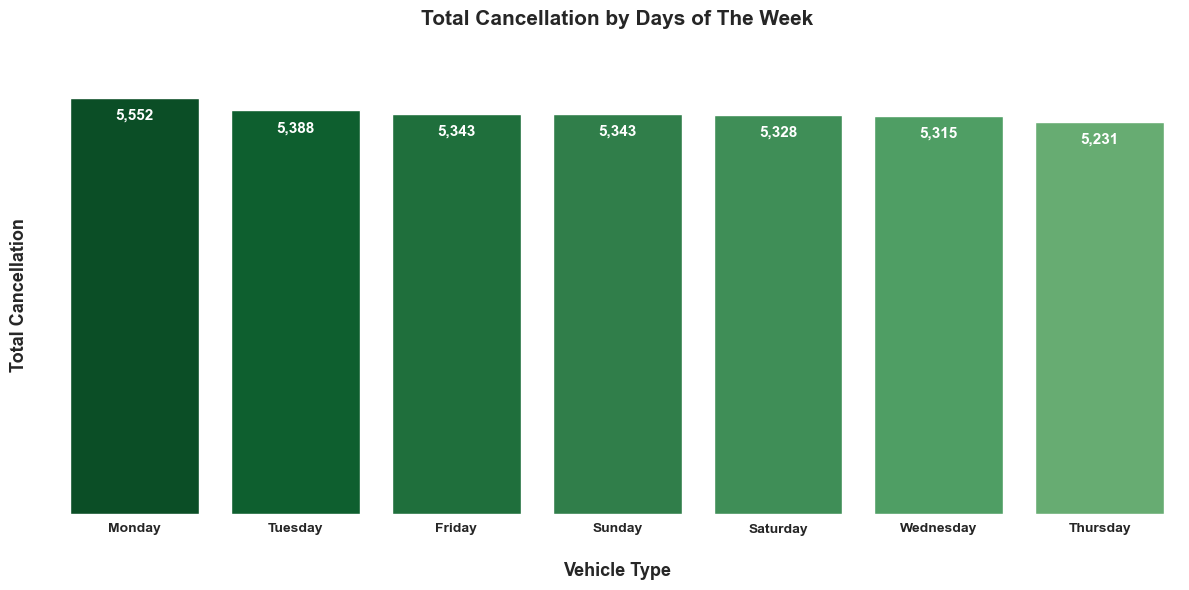

In [296]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.barplot(
        ax=ax, data=df_days_of_cancelling,
        x=df_days_of_cancelling.index,
        y='Total Cancelling',
        hue=df_days_of_cancelling.index,
        palette=sns.color_palette('Greens_r', 15)[0:7]
    )

    ax.set_title('Total Cancellation by Days of The Week\n\n', fontdict={
        'fontsize': 15,
        'fontweight': 'bold'
    }, loc='center')

    ax.set_ylabel('Total Cancellation\n', fontdict={
        'fontsize': 13,
        'fontweight': 'bold'
    })

    ylabels = list(np.arange(0, 6000 + 1, 1000))

    ax.set_yticks([])
    # ax.set_yticklabels(ylabels, fontdict={
    #     'fontsize': 10,
    #     'fontweight': 'bold'
    # })

    ax.set_xlabel('\nVehicle Type', fontdict={
        'fontsize': 13,
        'fontweight': 'bold'
    })
    
    xlabels = list(df_days_of_cancelling.index)

    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    for i, v in enumerate(df_days_of_cancelling['Total Cancelling']):
        ax.text(
            x=i,
            y=v - 240,
            s=f'{v:,}',
            color='white',
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )

    ax.set_frame_on(False)
    plt.tight_layout()
    plt.show()

In [279]:
df_clean['Driver Ratings'].mean().round(2)

np.float64(4.23)

In [280]:
df_clean['Customer Rating'].mean().round(2)

np.float64(4.4)

In [281]:
df_clean.columns

Index(['Date', 'Booking Status', 'Vehicle Type', 'Avg VTAT', 'Avg CTAT',
       'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
       'Cancelled Rides by Driver', 'Driver Cancellation Reason',
       'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [282]:
cols = [
    'Cancelled Rides by Customer',
    'Cancelled Rides by Driver',
    'Incomplete Rides',
    'Driver Ratings',
    'Customer Rating'
]

df_clean[cols].dtypes

Cancelled Rides by Customer      int64
Cancelled Rides by Driver        int64
Incomplete Rides                 int64
Driver Ratings                 float64
Customer Rating                float64
dtype: object

In [283]:
# df_clean.info()

In [284]:
print("Average ratings by vehicle type:")
df_clean.groupby("Vehicle Type")[["Driver Ratings", "Customer Rating"]].agg('mean')

Average ratings by vehicle type:


,Driver Ratings,Customer Rating
Vehicle Type,,
Auto,4.232369,4.402000
Bike,4.230056,4.403940
Go Mini,4.227694,4.404297
Go Sedan,4.231812,4.409996
Premier Sedan,4.234865,4.403457
Uber XL,4.238340,4.404851
eBike,4.225614,4.403954


In [285]:
print("Average ratings by payment method:")
df_clean.groupby("Payment Method")[["Driver Ratings", "Customer Rating"]].agg('mean')

Average ratings by payment method:


,Driver Ratings,Customer Rating
Payment Method,,
Cash,4.232785,4.405369
Credit Card,4.231620,4.408058
Debit Card,4.226893,4.405753
UPI,4.230351,4.402137
Uber Wallet,4.231920,4.408424


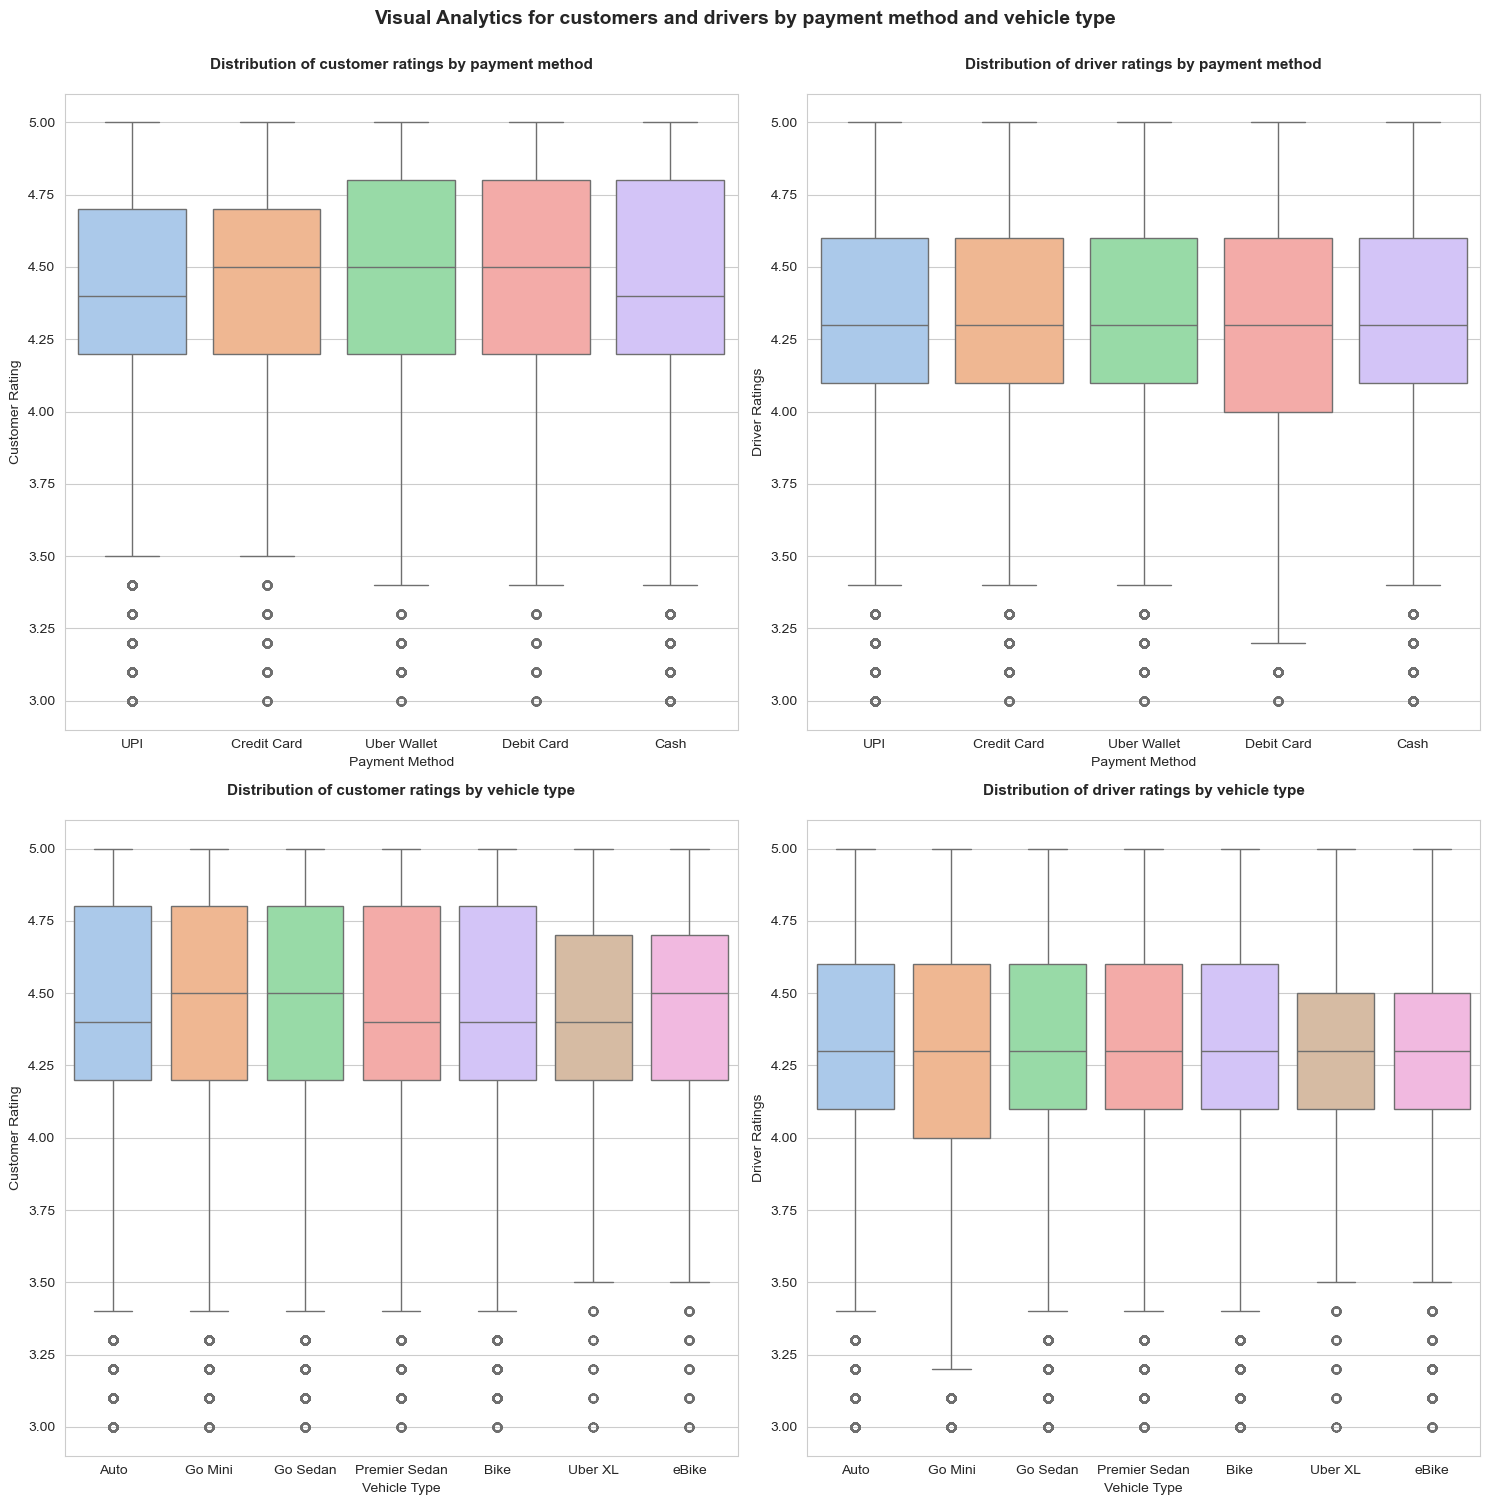

In [286]:
title_config = {
    'fontsize': 11,
    'fontweight': 'bold'
}

palette = sns.color_palette(
    'pastel',
    10
)

with sns.axes_style('whitegrid'):
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    fig.suptitle('Visual Analytics for customers and drivers by payment method and vehicle type', fontweight='bold', fontsize=14,
                 y=1)
    
    sns.boxplot(data=df_clean, x="Payment Method", y="Customer Rating", ax=axs[0][0], palette=palette[0:5])
    axs[0][0].set_title("Distribution of customer ratings by payment method\n", fontdict=title_config)

    sns.boxplot(data=df_clean, x="Payment Method", y="Driver Ratings", ax=axs[0][1], palette=palette[0:5])
    axs[0][1].set_title("Distribution of driver ratings by payment method\n", fontdict=title_config)
    
    sns.boxplot(data=df_clean, x="Vehicle Type", y="Customer Rating", ax=axs[1][0], palette=palette[0:7])
    axs[1][0].set_title("Distribution of customer ratings by vehicle type\n", fontdict=title_config)

    sns.boxplot(data=df_clean, x="Vehicle Type", y="Driver Ratings", ax=axs[1][1], palette=palette[0:7])
    axs[1][1].set_title("Distribution of driver ratings by vehicle type\n", fontdict=title_config)

    plt.tight_layout()
    plt.show()

In [287]:
df_payment_method = df_clean['Payment Method'].value_counts().reset_index().rename(
    columns={
        'count': 'Count'
    }
)

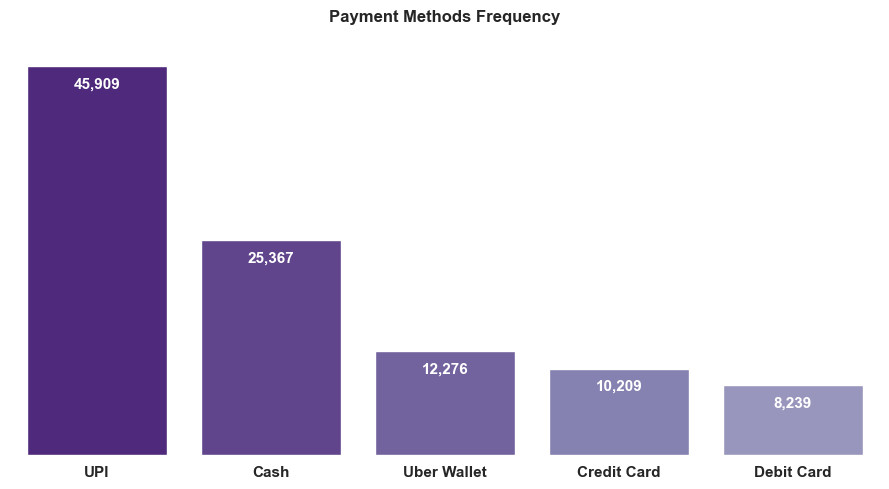

In [288]:
palette = sns.color_palette(
    'Purples_r',
    10
)

yticklabels_dict = {
    'fontweight': 'bold',
    'fontsize': 11
}

title_config = {
    'fontweight': 'bold',
    'fontsize': 12
}

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(9, 5))

    sns.barplot(
        data=df_payment_method,
        ax=ax,
        x='Payment Method',
        y='Count',
        palette=palette[0:5]
    )

    ax.set_title(
        'Payment Methods Frequency\n',
        fontdict=title_config
    )

    ax.set_ylabel('')
    ax.set_xlabel('')

    labels = list(df_payment_method['Payment Method'].unique())

    ax.set_xticks(labels)
    ax.set_xticklabels(
        labels=labels,
        fontdict=yticklabels_dict
    )

    ax.set_frame_on(False)
    ax.set_yticks([])

    for i, v in enumerate(df_payment_method['Count']):
        ax.text(
            x=i,
            y=v - 2000,
            s=f'{v:,}',
            color='white',
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )

    plt.tight_layout()
    plt.show()

In [289]:
cols = ['Booking Value', 'Payment Method']

df_payment_method_value_mean = df_clean[cols].groupby(
    by='Payment Method'
).agg('mean')

In [290]:
df_payment_method_value_mean

,Booking Value
Payment Method,
Cash,508.363188
Credit Card,511.707807
Debit Card,507.405025
UPI,508.508157
Uber Wallet,505.123656


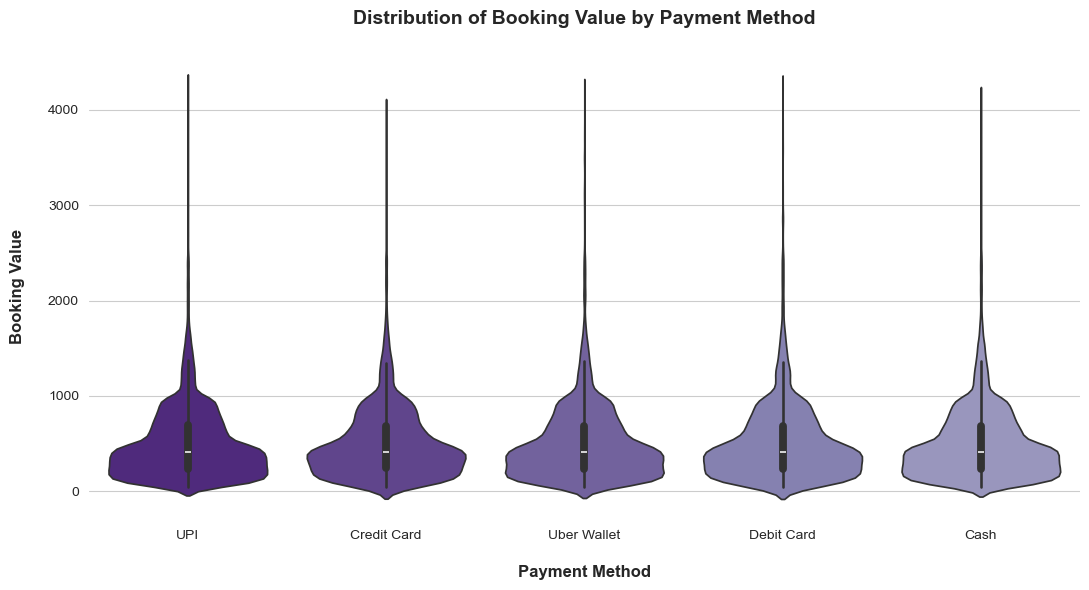

In [291]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(11, 6))
    sns.violinplot(
        data=df_clean,
        ax=ax,
        x='Payment Method',
        y='Booking Value',
        palette=palette[0:5]
    )

    ax.set_title('Distribution of Booking Value by Payment Method\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('\nPayment Method', fontsize=12, fontweight='bold')
    ax.set_ylabel('Booking Value\n', fontsize=12, fontweight='bold')
    
    ax.set_frame_on(False)
    plt.tight_layout()
    plt.show()

In [292]:
wanted_cols = ['Date', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver']

cancel_cust = 'Cancelled Rides by Customer'
cancel_driv = 'Cancelled Rides by Driver'

df_months_of_cancelling = df_clean.copy(deep=True)[wanted_cols]

df_months_of_cancelling['Month'] = df_months_of_cancelling['Date'].dt.month_name()
df_months_of_cancelling['Month'].unique()

cols = ['Month', cancel_cust, cancel_driv]

df_months_of_cancelling = df_months_of_cancelling[cols].groupby(
    by='Month'
).agg('sum')

df_months_of_cancelling['Total Cancelling'] = df_months_of_cancelling[cancel_cust] + df_months_of_cancelling[cancel_driv]

df_months_of_cancelling = df_months_of_cancelling.sort_values(by='Total Cancelling', ascending=False)
df_months_of_cancelling

,Cancelled Rides by Customer,Cancelled Rides by Driver,Total Cancelling
Month,,,
July,932,2332,3264
May,919,2317,3236
January,893,2324,3217
August,834,2351,3185
March,906,2240,3146
October,894,2224,3118
June,883,2206,3089
November,864,2220,3084
December,864,2210,3074


In [293]:
df_months_of_cancelling = df_months_of_cancelling.sort_values(by='Total Cancelling', ascending=False)

In [294]:
df_months_of_cancelling

,Cancelled Rides by Customer,Cancelled Rides by Driver,Total Cancelling
Month,,,
July,932,2332,3264
May,919,2317,3236
January,893,2324,3217
August,834,2351,3185
March,906,2240,3146
October,894,2224,3118
June,883,2206,3089
November,864,2220,3084
December,864,2210,3074


In [300]:
df_months_of_cancelling.to_csv(r'../data/processed/df_months_of_cancelling.csv')

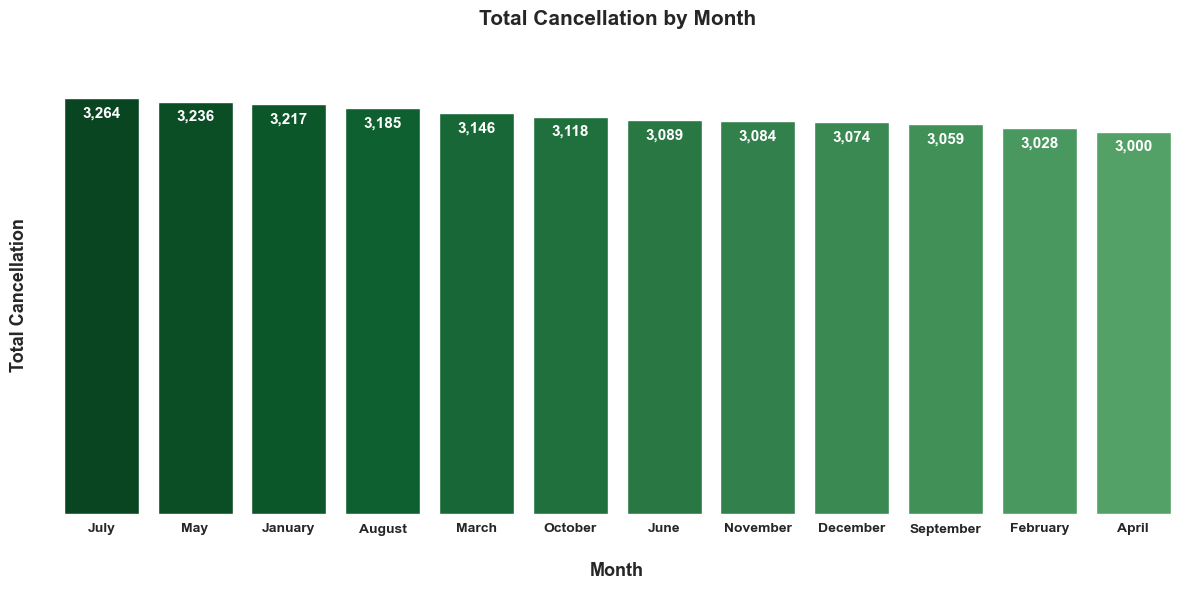

In [298]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.barplot(
        ax=ax,
        data=df_months_of_cancelling,
        x=df_months_of_cancelling.index,
        y='Total Cancelling',
        hue=df_months_of_cancelling.index,
        palette=sns.color_palette('Greens_r', 30)[0:12]
    )

    ax.set_title('Total Cancellation by Month\n\n', fontdict={
        'fontsize': 15,
        'fontweight': 'bold'
    }, loc='center')

    ax.set_ylabel('Total Cancellation\n', fontdict={
        'fontsize': 13,
        'fontweight': 'bold'
    })

    ylabels = list(np.arange(0, 3500 + 1, 500))

    ax.set_yticks([])
    # ax.set_yticklabels(ylabels, fontdict={
    #     'fontsize': 10,
    #     'fontweight': 'bold'
    # })

    ax.set_xlabel('\nMonth', fontdict={
        'fontsize': 13,
        'fontweight': 'bold'
    })
    
    xlabels = list(df_months_of_cancelling.index)

    ax.set_xticks(xlabels)
    ax.set_xticklabels(xlabels, fontdict={
        'fontsize': 10,
        'fontweight': 'bold'
    })

    for i, v in enumerate(df_months_of_cancelling['Total Cancelling']):
        ax.text(
                x=i,
                y=v - 120,
                s=f'{v:,}',
                color='white',
                fontsize=11,
                fontweight='bold',
                ha='center',
                va='center'
            )

    ax.set_frame_on(False)
    plt.tight_layout()
    plt.show()